# 1 Warm up

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a)

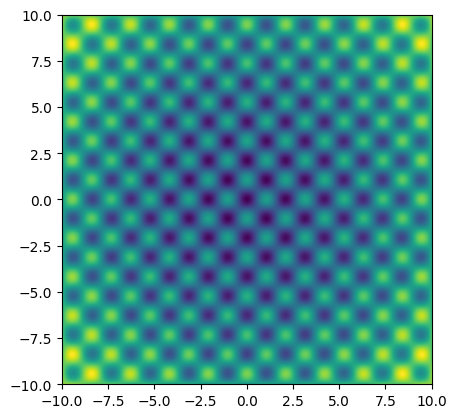

In [3]:
delta = 0.01
x = y = np.arange(-10.0,10.0,delta)
X,Y = np.meshgrid(x,y)
f1 = 1/100*(X**2+Y**2)
f2 = 1/2*(np.cos(3*X-3*Y)+np.cos(3*X+3*Y))
f_heat = f1 - f2
fig_f_heat, ax = plt.subplots()
imf = ax.imshow(f_heat,extent=[-10,10,-10,10])

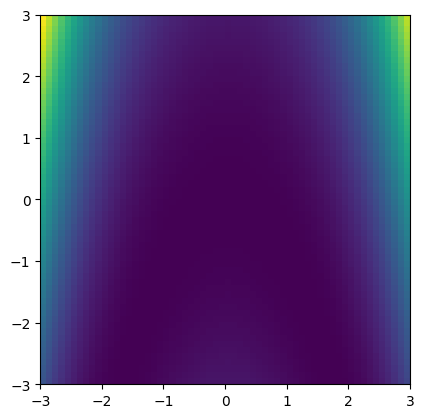

In [4]:
delta = 0.1
x = y = np.arange(-3,3,delta)
X,Y = np.meshgrid(x,y)
g_heat = (X-1)**2 + 100*(X**2-Y)**2
fig_g_heat, ax = plt.subplots()
im = ax.imshow(g_heat,extent=[-3,3,-3,3])

b)

In [5]:
from mpl_toolkits import mplot3d

In [6]:
def f_shape(x, y):
    return 1/100*(x**2+y**2) - 1/2*(np.cos(3*x-3*y)+np.cos(3*x+3*y))

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)

X, Y = np.meshgrid(x, y)
Z = f_shape(X, Y)

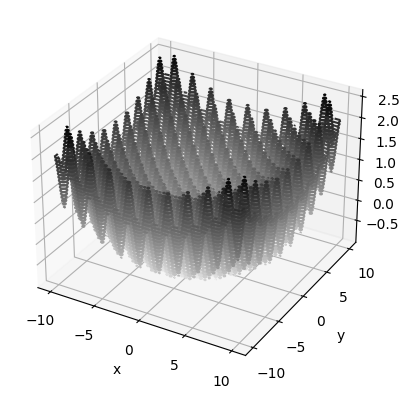

In [7]:
fig_f = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Shape of f:
Looks like a mountain terrain. No "jumps" or "flat regions".
A lot of local Optimas. At least one of them is a global optima on the Intervall.

In [8]:
def g_shape(x, y):
    return (x-1)**2 + 100*(x**2-y)**2

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)
Z = g_shape(X, Y)

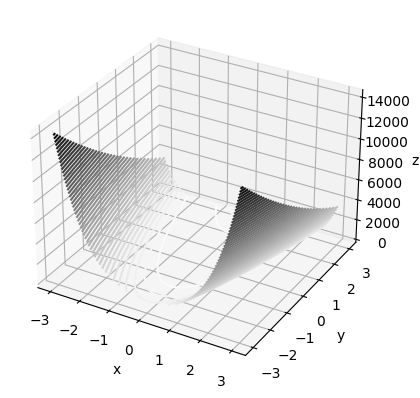

In [9]:
fig_g = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Shape of g:
Kind of looks like a folded piece of Paper. Has a big "flat region" but no "jumps"
2 Local optimas. Both of them are Global optimas.

c)

In [10]:
from numpy.random import rand
from scipy.optimize import minimize

In [11]:
def f(x):
    return 1/100*(x[0]**2+x[1]**2) - 1/2*(np.cos(3*x[0]-3*x[1])+np.cos(3*x[0]+3*x[1]))
r_min, r_max = -10, 10
p_0 = r_min + rand(2) * (r_max - r_min)
result = minimize(f,p_0,method='nelder-mead')
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = f(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : Optimization terminated successfully.
Total Evaluations: 73
Solution: f([-3.13461985 -7.31415248]) = -0.36537


In [12]:
def g(x):
    return (x[0]-1)**2 + 100*(x[0]**2-x[1])**2
r_min, r_max = -3, 3
p_0 = r_min + rand(2) * (r_max - r_min)
result = minimize(g,p_0,method='nelder-mead')
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = g(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : Optimization terminated successfully.
Total Evaluations: 145
Solution: f([0.99998877 0.99997694]) = 0.00000


d)

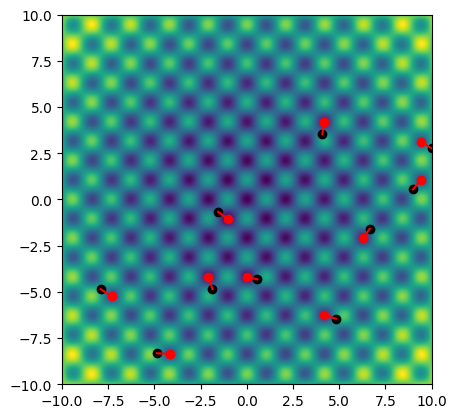

In [13]:
#f
r_min, r_max = -10, 10
delta = 0.01
x = y = np.arange(-10.0,10.0,delta)
X,Y = np.meshgrid(x,y)
fig_f_heat, ax = plt.subplots()
imf = ax.imshow(f_heat,extent=[-10,10,-10,10])
for l in range(10):
        p_0 = r_min + rand(2) * (r_max - r_min)
        plt.plot(p_0[0],p_0[1],color='black',marker='o')
        result = minimize(f,p_0,method='nelder-mead')
        solution = result['x']
        evaluation = f(solution)
        plt.plot(solution[0],solution[1],color='red',marker='o')
        plt.plot([p_0[0],solution[0]], [p_0[1],solution[1]], color='red')

For the function f the Nelder-Mead algorithm returns no good solution. Most points p_0 have their own result after using this algorithm and there is no unique optimum. There are a lot of local Optima. This means the Results are bad because they are very dependant on the starting point.

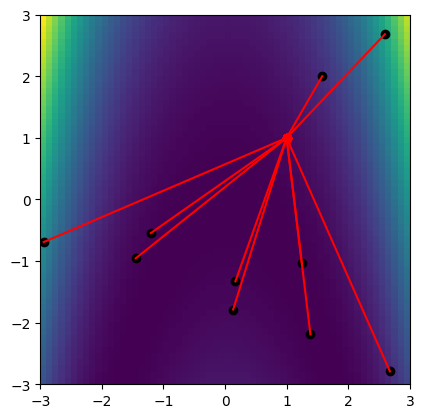

In [14]:
#g
r_min, r_max = -3, 3
delta = 0.01
x = y = np.arange(-3.0,3.0,delta)
X,Y = np.meshgrid(x,y)
fig_g_heat, ax = plt.subplots()
imf = ax.imshow(g_heat,extent=[-3,3,-3,3])
for l in range(10):
        p_0 = r_min + rand(2) * (r_max - r_min)
        plt.plot(p_0[0],p_0[1],color='black',marker='o')
        result = minimize(g,p_0,method='nelder-mead')
        solution = result['x']
        evaluation = g(solution)
        plt.plot(solution[0],solution[1],color='red',marker='o')
        plt.plot([p_0[0],solution[0]], [p_0[1],solution[1]], color='red')

For the function g the Nelder-Mead algorithm returns a good solution. All startingpoints return the same Solution and therefor a unique Optima. This means the result is usable and good.

2a)

We assume the sheet is a square and folded into 3 equal parts.

Since the sheet is folded into equal parts, the dimensions of the box are:

$l=w=h= \frac{s}{3} $

Now Volume of the box $V = \frac{s^3}{27}$

As the sheet is square, total area is $s^2$
Cost per box: $C_p = 2 \times .75 \times s^2 = 1.5 \times s^2$

Assuming labor cost is depended on the longest side(which is $\frac{s}{3} $ because of square assumption and 4 times longer production time suggestion from problem):

$C_l = k \times \frac{s^2}{9}$

Revenue from the box:

$2.50 \times V = 2.50 \times \frac{s^3}{27}$
<br>
<br>
<br>
Our formula:

$$ max(2.50 \times \frac{s^3}{27} -  ((1.5 \times s^2) + k \times \frac{s^2}{9})) $$

Simplifying: <br>

$$ max( \frac{5s^3}{54} -  (s^2 × (1.5 + \frac{k}{9})) $$

Where,<br>
$s$ is the side length of the square sheet<br>
$k$ is a constant of labor cost

<br>

Constraints:<br>
Non-Negativity: $s>0$ <br>
Upper Bound: $s \leq S_{max}$(the practical limit on paper size).

Here we try to maximize our profit per box.

2b)
<br>
In standard form: <br>

$$ min( s^2 × (1.5 + \frac{k}{9}) - \frac{5s^3}{54} ) $$

Constraints:<br>
Non-Negativity: $s>0$ <br>
Upper Bound: $s - S_{max} \geq 0$

2c)

As we are assuming some constants that might not be applicable to the real world. For a problem setup idealy with a lot of assumption, this should provide a somewhat good result.

2d)

In [1]:
import numpy as np
from scipy.optimize import minimize

In [4]:
def f(s, k=1.0):
    term1 = s**2 * (1.5 + k / 9)
    term2 = (5 * s**3) / 54
    return term1 - term2

constraints = [
    {'type': 'ineq', 'fun': lambda s: s},
    {'type': 'ineq', 'fun': lambda s: s - S_max}
]


initial_guess = 1.0
S_max = 10.0
k = 1.0


result = minimize(f, initial_guess, args=(k,), method='Nelder-Mead', constraints=constraints)


if result.success:
    optimized_s = result.x[0]
    print(f"Optimized side length (s): {optimized_s}")
else:
    print("Optimization failed.")


Optimized side length (s): -8.881784197001252e-16


<ipython-input-4-1c7d67ce00a7>:17: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  result = minimize(f, initial_guess, args=(k,), method='Nelder-Mead', constraints=constraints)


2e)

This value is very close to zero,  but it is negative, which is problematic because side lengths can't be negative in real-world problems. Thus not yet a good solution.

Problem might be the `Nelder-Mead` algorithm as it can't directly handle our constraints.

Maybe using other algorithm might result in better result.